In [26]:
# third party
import matplotlib.pyplot as plt

# relative import
from mnist_dataset import mnist
from mnist_dataset import mnist_raw
import numpy as np

# syft absolute
import syft as sy

print(f"{sy.__version__ = }")

sy.__version__ = '0.8.4'


## 1. Launch the domain, upload the data

In [27]:
node = sy.orchestra.launch(name="mnist-domain", dev_mode=True, reset=True)
root_client = node.login(email="info@openmined.org", password="changethis")

Staging Protocol Changes...
SQLite Store Path:
!open file://C:\Users\q1162\AppData\Local\Temp\18fc0a5681da44b196db9e9427744187.sqlite
Creating default worker image with tag='local-dev'
Building default worker image with tag=local-dev
Setting up worker poolname=default-pool workers=0 image_uid=54c8d2fc5e774c96a37ba10ce94d6d09 in_memory=True
Created default worker pool.
Data Migrated to latest version !!!
Logged into <mnist-domain: High side Domain> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].me.set_password([new_password])`.

### Load the MNIST dataset

Let's load the raw MNIST images and show with the `mnist_raw` function from [`mnist_datasets.py`](./datasets.py)

In [28]:
train_images, train_labels, _, _ = mnist_raw()

train image num: 60000


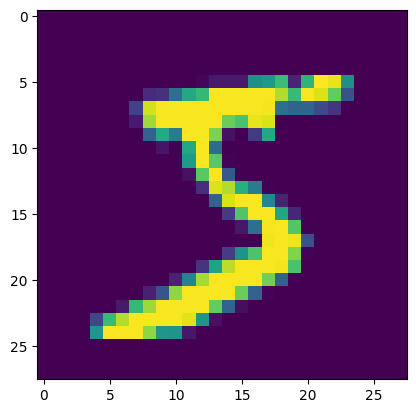

In [29]:
print("train image num: "+str(len(train_images)))
plt.imshow(train_images[0])

In [30]:
train_labels[0]

5

In [31]:
print(f"{train_images.shape = }")
print(f"{train_labels.shape = }")

train_images.shape = (60000, 28, 28)
train_labels.shape = (60000,)


### Processing: Flattening the MNIST images and apply one-hot encoding on the labels

In [32]:
train_images, train_labels, _, _ = mnist()

### Get a subset of MNIST

In [33]:
num_samples = 1000

In [34]:
train_images = train_images[:num_samples, :]
train_labels = train_labels[:num_samples, :]

In [35]:
print(f"{train_images.shape = }")
print(f"{train_labels.shape = }")

train_images.shape = (1000, 784)
train_labels.shape = (1000, 10)


The `train_images` and `train_labels` are the private data. Let's create similar mock data with the same shape

In [36]:
mock_images = np.random.rand(num_samples, 784)
mock_images.shape

(1000, 784)

In [37]:
mock_labels = np.eye(10)[np.random.choice(10, num_samples)]
mock_labels.shape

(1000, 10)

In [38]:
assert mock_labels.shape == train_labels.shape
assert mock_images.shape == train_images.shape

### The DO uploads the data

In [39]:
dataset = sy.Dataset(
    name="MNIST data",
    description="""Contains the flattened training images and one-hot encoded training labels.""",
    url="https://storage.googleapis.com/cvdf-datasets/mnist/",
)

dataset.add_contributor(
    role=sy.roles.UPLOADER,
    name="Alice",
    email="alice@openmined.com",
    note="Alice is the data engineer at the OpenMined",
)

dataset.contributors

{syft.service.dataset.dataset.Contributor}

In [40]:
asset_mnist_train_input = sy.Asset(
    name="MNIST training images",
    description="""The training images of the MNIST dataset""",
    data=train_images,
    mock=mock_images,
)

asset_mnist_train_labels = sy.Asset(
    name="MNIST training labels",
    description="""The training labels of MNIST dataset""",
    data=train_labels,
    mock=mock_labels,
)

dataset.add_asset(asset_mnist_train_input)
dataset.add_asset(asset_mnist_train_labels)

SyftSuccess: Asset 'MNIST training labels' added to 'MNIST data' Dataset.

In [41]:
root_client.upload_dataset(dataset)

  0%|          | 0/2 [00:00<?, ?it/s]

Uploading: MNIST training images


 50%|█████     | 1/2 [00:00<00:00,  1.01it/s]

Uploading: MNIST training labels


100%|██████████| 2/2 [00:01<00:00,  1.14it/s]


SyftSuccess: Dataset uploaded to 'mnist-domain'. To see the datasets uploaded by a client on this node, use command `[your_client].datasets`

### The DO inspects the uploaded data

In [42]:
datasets = root_client.api.services.dataset.get_all()
assert len(datasets) == 1
datasets

DictTuple(syft.service.dataset.dataset.Dataset,)

#### The first asset of the dataset contains the training and mock images

In [43]:
datasets[0].assets[0]

syft.service.dataset.dataset.Asset

#### The second asset contains the training and mock labels

In [44]:
datasets[0].assets[1]

syft.service.dataset.dataset.Asset

### The DO creates an account for the Data Scientist (DS)

In [45]:
register_result = root_client.register(
    name="Sheldon Cooper",
    email="sheldon@caltech.edu",
    password="changethis",
    password_verify="changethis",
    institution="Caltech",
    website="https://www.caltech.edu/",
)

In [46]:
assert isinstance(register_result, sy.SyftSuccess)

### 📓 Now switch to the [first DS's notebook](./01-data-scientist-submit-code.ipynb)